# Ensemble Learning in Machine Learning: A Comprehensive Overview

Ensemble learning, a powerful technique in machine learning, combines multiple models to improve predictive accuracy and robustness. This code tutorial provides an overview of popular ensemble methods, including bagging, random forests, boosting, and stacking. We explore their underlying principles, advantages, and use cases. Bagging aggregates predictions from diverse base models, while random forests enhance decision trees by reducing overfitting. Boosting iteratively adjusts model weights to focus on misclassified instances, leading to stronger classifiers. Stacking combines multiple models into a meta-model, leveraging their complementary strengths. We discuss practical considerations, such as hyperparameter tuning and ensemble diversity. By understanding ensemble techniques, practitioners can enhance model performance and tackle complex real-world problems.





# Loading Libraries

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier


# Dataset

In [2]:
# Load the breast_cancer dataset
breast_cancer  = load_breast_cancer()

# Extract features and target
X, y = breast_cancer.data[:, [1, 3]], breast_cancer.target


# Decision Tree Classifier

Decision Tree Classifier Accuracy: 1.0


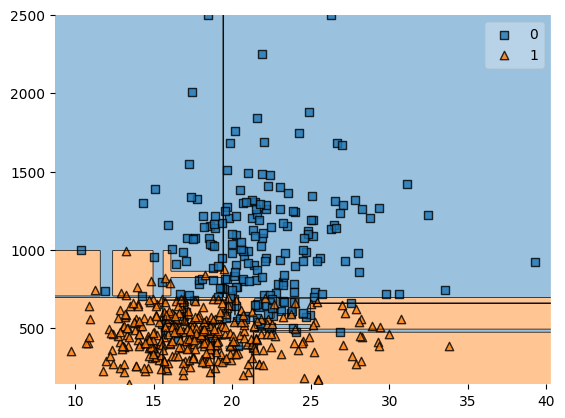

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X, y)
print(f"Decision Tree Classifier Accuracy: {clf.score(X, y)}")
plot_decision_regions(X, y, clf)
plt.show()


# Bagging Classifier

Bagging Classifier Accuracy: 0.8945518453427065


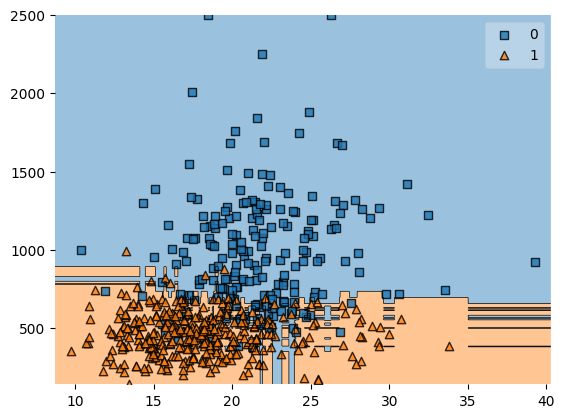

In [4]:
bg = BaggingClassifier(base_estimator=clf, max_samples=0.1, max_features=0.1, n_estimators=10)
bg.fit(X, y)
print(f"Bagging Classifier Accuracy: {bg.score(X, y)}")
plot_decision_regions(X, y, bg)
plt.show()


# Random Forest Classifier

Random Forest Classifier Accuracy: 0.9912126537785588


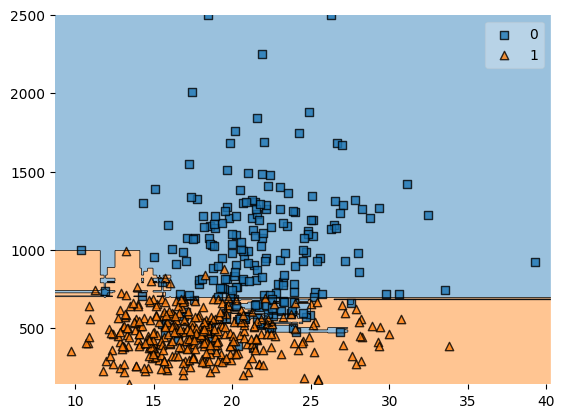

In [5]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y)
print(f"Random Forest Classifier Accuracy: {rf.score(X, y)}")
plot_decision_regions(X, y, rf)
plt.show()


# Adaptive Boosting Classifier

AdaBoost Classifier Accuracy (n_estimators=1): 0.8945518453427065


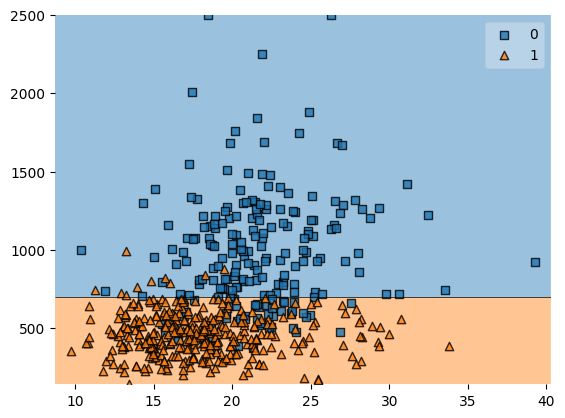

AdaBoost Classifier Accuracy (n_estimators=2): 0.8945518453427065


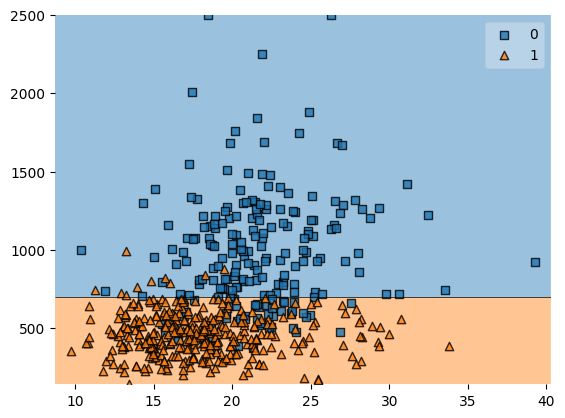

AdaBoost Classifier Accuracy (n_estimators=5): 0.8998242530755711


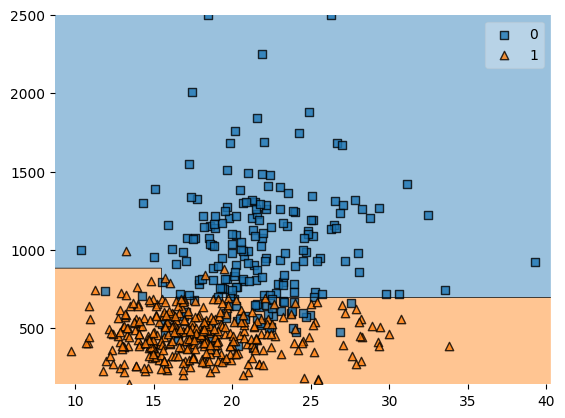

AdaBoost Classifier Accuracy (n_estimators=10): 0.9121265377855887


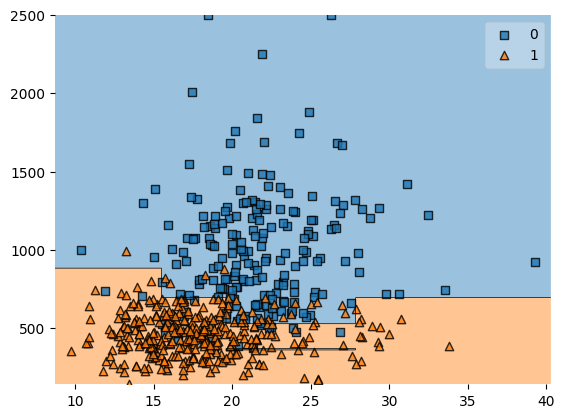

In [6]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
for num_est in [1, 2, 5, 10]:
    clf_boost = AdaBoostClassifier(clf, n_estimators=num_est)
    clf_boost.fit(X, y)
    print(f"AdaBoost Classifier Accuracy (n_estimators={num_est}): {clf_boost.score(X, y)}")
    plot_decision_regions(X, y, clf_boost)
    plt.show()


# Gradient Boosting Classifier

Gradient Boosting Classifier Accuracy: 0.8947368421052632


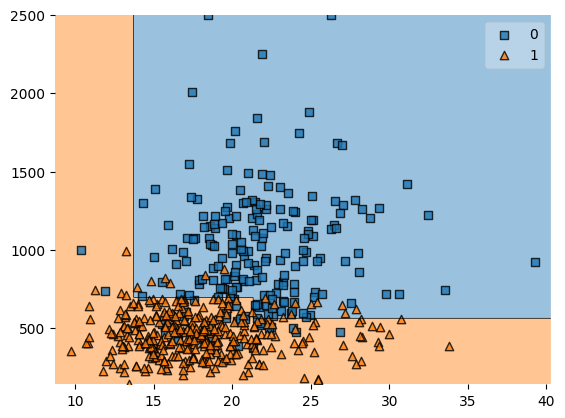

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = GradientBoostingClassifier(n_estimators=10)
model.fit(x_train, y_train)
print(f"Gradient Boosting Classifier Accuracy: {model.score(x_test, y_test)}")
plot_decision_regions(X, y, model)
plt.show()


# Extreme Gradient Boosting Classifier

XGBoost Classifier Accuracy: 0.8947368421052632


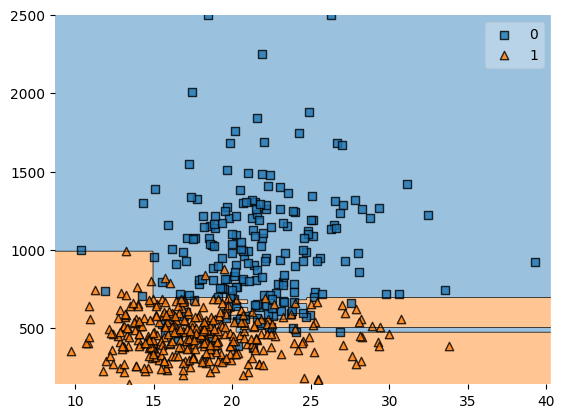

In [8]:
model = xgb.XGBClassifier(n_estimators=10)
model.fit(x_train, y_train)
print(f"XGBoost Classifier Accuracy: {model.score(x_test, y_test)}")
plot_decision_regions(X, y, model)
plt.show()


# Stacking Algorithm

Accuracy for KNeighborsClassifier: 0.8771929824561403


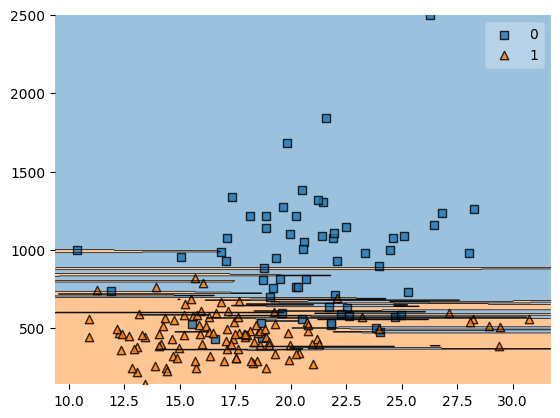

Accuracy for GaussianNB: 0.8596491228070176


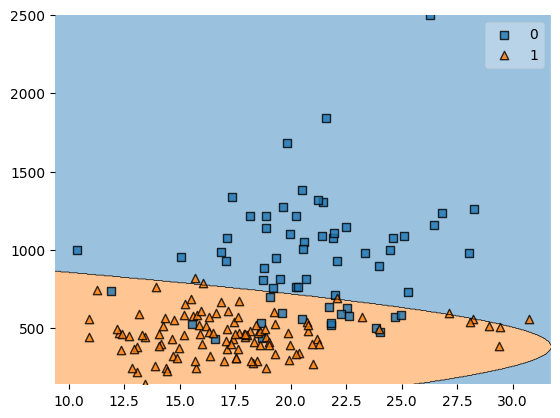

Accuracy for RandomForestClassifier: 0.8654970760233918


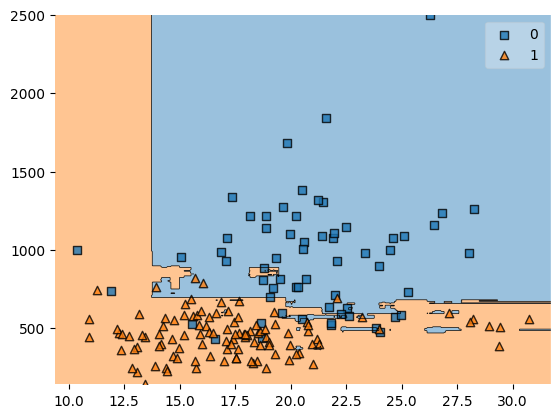

Accuracy for StackingClassifier: 0.8830409356725146


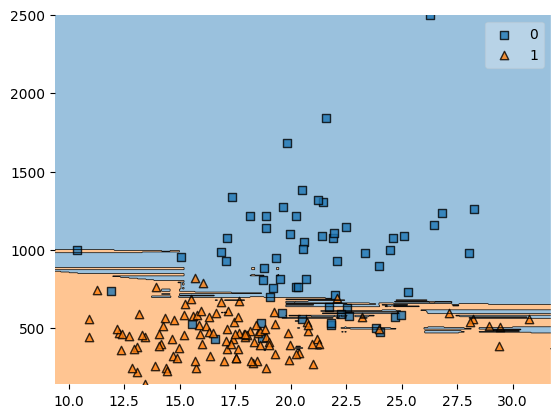

In [9]:
# Initialize base classifiers
clfk = KNeighborsClassifier(n_neighbors=1)
clfg = GaussianNB()
clfr = RandomForestClassifier()
lr = LogisticRegression()

# Initialize Stacking Classifier with meta-classifier (Logistic Regression)
sclf = StackingClassifier(classifiers=[clfk, clfg, clfr], meta_classifier=lr)

# List of classifiers
clfs = [clfk, clfg, clfr, sclf]

# Train and evaluate each classifier
for classifier in clfs:
    classifier.fit(x_train, y_train)
    print(f'Accuracy for {classifier.__class__.__name__}: {classifier.score(x_test, y_test)}')
    plot_decision_regions(x_test, y_test, classifier)
    plt.show()
